In [2]:
import numpy as np
import sklearn 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

我们看一些基本的CNN模型。

# fashion_mnist的CNN分类
我们先看一下使用一个典型的CNN为fashion_mnist分类。

9


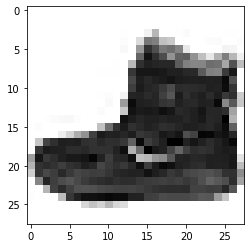

In [19]:
(x_train_full, y_train_full),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()
plt.imshow(x_train[0], cmap='binary')
print(y_train[0])

In [20]:
x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

x_mean = x_train.mean(axis=0, keepdims=True)
x_std = x_train.std(axis=0, keepdims=True) + 1e-7
x_train = (x_train - x_mean) / x_std
x_valid = (x_valid - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

x_train = x_train[..., np.newaxis]
x_valid = x_valid[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [21]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding='SAME')

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1719/1719 [==============================] - 51s 29ms/step - loss: 0.4135 - accuracy: 0.8614 - val_loss: 0.3255 - val_accuracy: 0.8849
Epoch 2/2
1719/1719 [==============================] - 50s 29ms/step - loss: 0.3535 - accuracy: 0.8811 - val_loss: 0.3338 - val_accuracy: 0.8796
